# **Week 9 Review**
-----

-- Adapted from Boom and Adi

### 1. Understand how to turn the date into the index
### 2. Understand and implement the following pandas methods:
- `.rolling()`
- `.diff()`
- `.pct_change()`
- `.shift()`

In [1]:
# import relevant modules
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARMA
from sklearn.metrics import r2_score

# import the bus ridership data
bus = pd.read_csv('./data/bus.csv')
bus.head()

,date,bus_ridership
0,1973-01-01,648
1,1973-02-01,646
2,1973-03-02,639
3,1973-04-02,654
4,1973-05-02,630


In [2]:
# When reading in data, date column is often an object
bus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114 entries, 0 to 113
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   date           114 non-null    object
 1   bus_ridership  114 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 1.9+ KB


In [3]:
# convert date into datetime objects
bus['date'] = pd.to_datetime(bus['date'])

In [4]:
bus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114 entries, 0 to 113
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           114 non-null    datetime64[ns]
 1   bus_ridership  114 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.9 KB


In [5]:
# change index of dataframe to the date
bus = bus.set_index('date')

In [6]:
bus.head()

,bus_ridership
date,
1973-01-01,648
1973-02-01,646
1973-03-02,639
1973-04-02,654
1973-05-02,630


### `.rolling()`
> Allows for rolling statistics (ie. "I want the average of the past 7 days' ridership")
- **`window`** : the "length" or the period of the window
- **`min_periods=None`** : Min number of observations in a window
- **`win_type=None`** : Type of window

In [7]:
bus['SevenDayTotal'] = bus['bus_ridership'].rolling(window = 7).sum()
bus['WeeklyAverage'] = bus['bus_ridership'].rolling(window = 7).mean()

In [8]:
bus.head(10)

,bus_ridership,SevenDayTotal,WeeklyAverage
date,,,
1973-01-01,648,NaN,NaN
1973-02-01,646,NaN,NaN
1973-03-02,639,NaN,NaN
1973-04-02,654,NaN,NaN
1973-05-02,630,NaN,NaN
1973-06-02,622,NaN,NaN
1973-07-02,617,4456.0,636.571429
1973-08-02,613,4421.0,631.571429
1973-09-02,661,4436.0,633.714286


### `.diff()`
> The literal subtraction between day x and the period specified
- **`periods`** : With what time before you subtract from
    - `periods = 1` : Subtracting from previous day
    - `periods = 7` : Subtracting from exactly 7 days ago

In [9]:
bus['DailyDiff']  = bus['bus_ridership'].diff()
bus['WeeklyDiff'] = bus['bus_ridership'].diff(7)

bus.head()

,bus_ridership,SevenDayTotal,WeeklyAverage,DailyDiff,WeeklyDiff
date,,,,,
1973-01-01,648,NaN,NaN,NaN,NaN
1973-02-01,646,NaN,NaN,-2.0,NaN
1973-03-02,639,NaN,NaN,-7.0,NaN
1973-04-02,654,NaN,NaN,15.0,NaN
1973-05-02,630,NaN,NaN,-24.0,NaN


### `.pct_change()`
> Percent change for the period specified

In [10]:
bus['DailyDiffPCT'] = bus['bus_ridership'].pct_change()

bus.head()

,bus_ridership,SevenDayTotal,WeeklyAverage,DailyDiff,WeeklyDiff,DailyDiffPCT
date,,,,,,
1973-01-01,648,NaN,NaN,NaN,NaN,NaN
1973-02-01,646,NaN,NaN,-2.0,NaN,-0.003086
1973-03-02,639,NaN,NaN,-7.0,NaN,-0.010836
1973-04-02,654,NaN,NaN,15.0,NaN,0.023474
1973-05-02,630,NaN,NaN,-24.0,NaN,-0.036697


### `.shift()`
> Shifts the rows down by specified period

In [11]:
bus['DailyOffset']  = bus['bus_ridership'].shift(1)
bus['WeeklyOffset'] = bus['bus_ridership'].shift(7)

bus.head(10)

,bus_ridership,SevenDayTotal,WeeklyAverage,DailyDiff,WeeklyDiff,DailyDiffPCT,DailyOffset,WeeklyOffset
date,,,,,,,,
1973-01-01,648,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1973-02-01,646,NaN,NaN,-2.0,NaN,-0.003086,648.0,NaN
1973-03-02,639,NaN,NaN,-7.0,NaN,-0.010836,646.0,NaN
1973-04-02,654,NaN,NaN,15.0,NaN,0.023474,639.0,NaN
1973-05-02,630,NaN,NaN,-24.0,NaN,-0.036697,654.0,NaN
1973-06-02,622,NaN,NaN,-8.0,NaN,-0.012698,630.0,NaN
1973-07-02,617,4456.0,636.571429,-5.0,NaN,-0.008039,622.0,NaN
1973-08-02,613,4421.0,631.571429,-4.0,-35.0,-0.006483,617.0,648.0
1973-09-02,661,4436.0,633.714286,48.0,15.0,0.078303,613.0,646.0


# 9.02 Principles of Time Series

### 1. Define time series and cross-sectional data.

- **Time series data**
> Data where each index value is a time 
- **Cross-sectional data**
> Data at one point in time

### 2. Describe forecasting, some of its challenges, and when it's advised.

> Predicting a future estimate for a target variable

- What are some challenges to consider when using time series data?
> 1. As we forecast farther out, accuracy  decreases
> 2. Changes will be compounded in future forecasts
> 3. Data availability (oftne an issue)?

### 3. Generate and interpret time plots.

In [12]:
# reset bus dataframe
bus = bus[['bus_ridership']]

# Specify frequency for data with date_range (this will be relevant later)!
bus.index = pd.date_range('1/1/1973', # start date is January 1, 1973
                               periods=len(bus.index), # we want one period per entry
                               freq='M') # frequency in months

In [13]:
bus.head()

,bus_ridership
1973-01-31,648
1973-02-28,646
1973-03-31,639
1973-04-30,654
1973-05-31,630


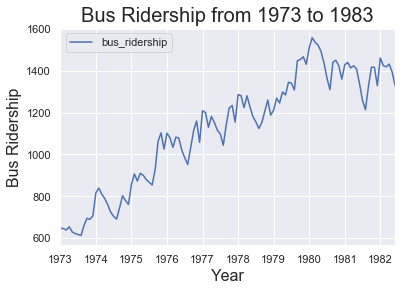

In [14]:
# Thanks, Sean Bjork!
sns.set()

bus.plot()
plt.title('Bus Ridership from 1973 to 1983', fontsize = 20)
plt.xlabel('Year', fontsize = 16)
plt.ylabel('Bus Ridership', fontsize = 16);

### 4. Define and identify trend and seasonality

- **Trends** : 
> patterns over time, long-term changes; most trends are linear or quadratic
- **Seasonality** :
> fluctuations over a "fixed and known" interval


In [15]:
bus.head()

,bus_ridership
1973-01-31,648
1973-02-28,646
1973-03-31,639
1973-04-30,654
1973-05-31,630


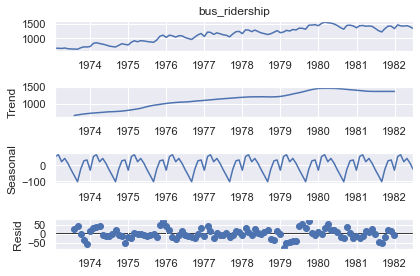

In [16]:
# This will always try to find some kind of seasonality
decomp = seasonal_decompose(bus['bus_ridership'])
decomp.plot();

### 5. Calculate, plot and interpret autocorrelation and partial autocorrelation.

- **Autocorrelation (or ACF) plots** :
> How correlated one row (time) is to the one before it (or some other specified time)
- **Partial autocorrelation (or PACF) plots** : 
> Autocorrelation but ignore previous correlations already accounted for

- Interpreting ACF (autocorrelation) and PACF (partial autocorrelation) plots
    - Y axis = level of correlation
    - X axis = Number of lags away.
    - Shaded blue area = region of uncertainty

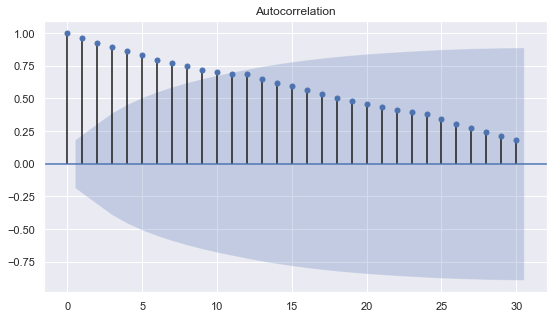

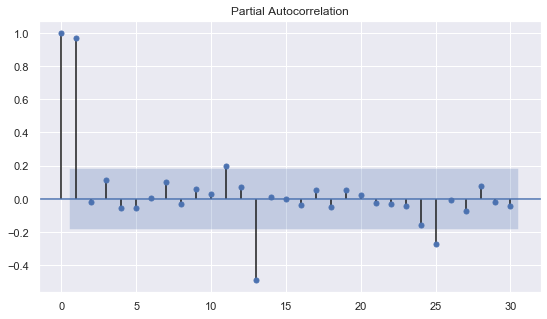

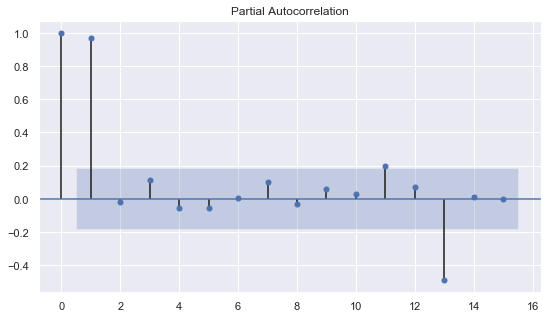

In [17]:
fig, ax = plt.subplots(figsize = (9, 5))
plot_acf(bus['bus_ridership'], lags = 30, ax = ax)
plt.show();

fig, ax = plt.subplots(figsize = (9, 5))
plot_pacf(bus['bus_ridership'], lags = 30, ax = ax)
plt.show();

fig, ax = plt.subplots(figsize = (9, 5))
plot_pacf(bus['bus_ridership'], lags = 15, ax = ax)
plt.show();

### Bonus: autocorrelation plot in pandas

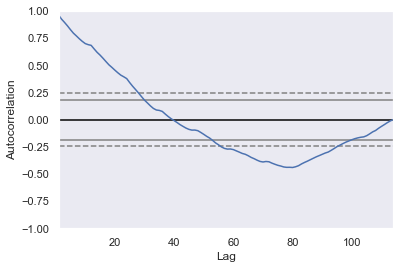

In [18]:
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(bus['bus_ridership']);

### 6. Properly fit, generate predictions from, and evaluate a linear time series model.

In [19]:
# make bus_ridership into float values
# (p,q), p is the AR part
bus['bus_ridership'] = bus['bus_ridership'].astype(float)

# fit an AR model with a lag of 1
ar1 = ARMA(endog = bus['bus_ridership'],
           order = (1, 0))

model = ar1.fit()

# generate predicted values
preds = model.predict()
r2_score(bus['bus_ridership'], preds)

0.9364431877685966

In [20]:
# fit a MA model with a window of 1
# (p,q), q is the MA part
ma1 = ARMA(endog = bus['bus_ridership'],
           order = (0, 1))

model = ma1.fit()
preds = model.predict()
r2_score(bus['bus_ridership'], preds)

0.6553314322628319

# 9.03-9.04 ARIMA

### 1. Define stationarity.

> Data that is detrended, mean is constant, line of best fit is horizontal

### 2. Conduct and interpret an augmented Dickey-Fuller test for stationarity.

In [21]:
from statsmodels.tsa.stattools import adfuller

# Original code written by Joseph Nelson
def interpret_dftest(series):
    return pd.Series(adfuller(series)[0:2], index=['Test Statistic','p-value'])

In [22]:
# Not stationary
interpret_dftest(bus['bus_ridership'])

Test Statistic   -1.536597
p-value           0.515336
dtype: float64

In [23]:
# First difference
interpret_dftest(bus['bus_ridership'].diff().dropna())

Test Statistic   -1.938696
p-value           0.314082
dtype: float64

In [24]:
# Second difference
interpret_dftest(bus['bus_ridership'].diff().diff().dropna())

Test Statistic   -1.247869e+01
p-value           3.126378e-23
dtype: float64

In [25]:
bus['second_diff_ridership'] = bus['bus_ridership'].diff().diff()
bus.head()

,bus_ridership,second_diff_ridership
1973-01-31,648.0,NaN
1973-02-28,646.0,NaN
1973-03-31,639.0,-5.0
1973-04-30,654.0,22.0
1973-05-31,630.0,-39.0


### 3. Construct integrated autoregressive moving average (ARIMA) models.

- Integrating AR and MA models results in an ARIMA model
- Useful when we want to model _longer term data with sudden fluctuations_

### 4. Describe when autoregressive models and moving average models are appropriate.

**Autoregressive (AR - p) models** :
> Better for long-term trends
- Number of previous observations to consider when predicting (lags)

**Moving average (MA - q) models** :
> Better for short-term fluctuations
- Number of errors we regress on

**Integrated (d)**
- How many differences we need to achieve stationarity

### 5. Identify the optimal values of parameters $p$, $d$, and $q$ through GridSearch.

# 9.05 Benford's Law

### 1. Understand what Benford's law is

> Numbers with a smaller first digit are more frequent

> Benford's law is an observation about the frequency distribution of leading digits in many real-life sets of numerical data. The law states that in many naturally occurring collections of numbers, the leading significant digit is likely to be small.

### 2. Use Benford's law to find anomalies within a dataset.

> convert numbers into strings, check count of first character (leading digit)

---